### Plotting using package matplotlib.pyplot

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read Cities.csv and Countries.csv into lists of dictionaries
cities = []
countries = []
with open('Cities.csv','r') as f: 
    rows = csv.DictReader(f)
    for r in rows:
        cities.append(r)
with open('Countries.csv','r') as f: 
    rows = csv.DictReader(f)
    for r in rows:
        countries.append(r)

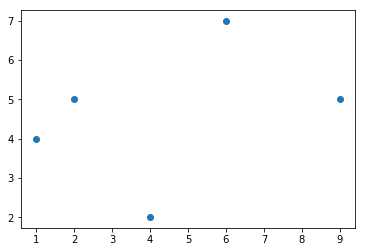

In [4]:
# Introduction to scatterplots
x = [1, 2, 4, 6, 9]
y = [4, 5, 2, 7, 5]
plt.scatter(x, y)
plt.show()

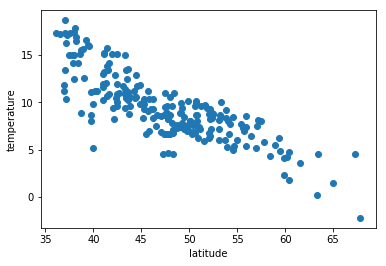

In [5]:
# Scatterplot of latitude versus temperature
x = []
y = []
for city in cities:
    x.append(float(city['latitude']))
    y.append(float(city['temperature']))
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.scatter(x, y)
plt.show()

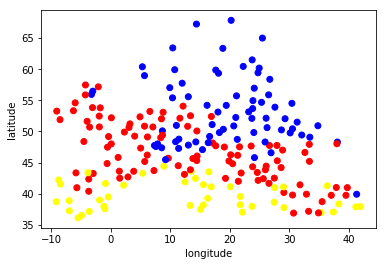

In [6]:
# Scatterplot of longitude versus latitude colored by temperature
x = []
y = []
colors = []
for city in cities:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    if float(city['temperature']) < 8:
        colors.append('blue')
    elif float(city['temperature']) >= 8 and float(city['temperature']) < 12:
        colors.append('red')
    else: colors.append('yellow')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x, y, c=colors)
plt.show()

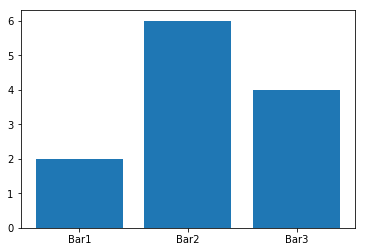

In [7]:
# Introduction to bar charts
bars = ['Bar1', 'Bar2', 'Bar3']
heights = [2, 6, 4]
plt.bar([0,1,2], heights, align='center')
plt.xticks([0,1,2], bars)
plt.show()

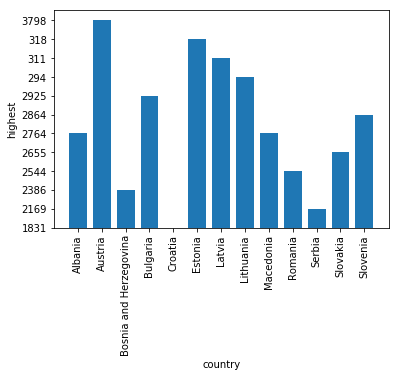

In [8]:
# Bar chart showing highest points of countries with 'ia' in their name
bars = [] # countries with 'ia' in their name
heights = [] # highest points of those countries
for country in countries:
    if 'ia' in country['country']:
        bars.append(country['country'])
        heights.append(country['highest'])
numbars = len(bars)
width = .75
# range(numbars) in following command yields [0,1,...,numbars-1]
plt.bar(range(numbars), heights, width, align='center')
plt.xlabel('country')
plt.ylabel('highest')
plt.xticks(range(numbars), bars, rotation='vertical')
plt.show()

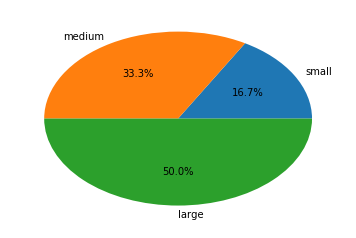

In [9]:
# Introduction to pie charts
sizes = [10, 20, 30]
lbls = ['small', 'medium', 'large']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

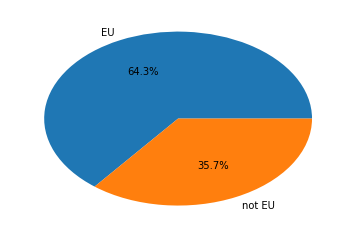

In [10]:
# Pie chart showing number of EU countries versus non-EU countries
numEU = 0
for country in countries:
    if country['EU'] == 'yes': numEU += 1
numNotEU = len(countries) - numEU
sizes = [numEU, numNotEU]
lbls = ['EU', 'not EU']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

### <font color="green">Your Turn: World Cup Data</font>

In [12]:
# Read Players.csv and Teams.csv into lists of dictionaries
players = []
teams = []
with open('Players.csv','r') as f: 
    rows = csv.DictReader(f)
    for r in rows:
        players.append(r)
with open('Teams.csv','r') as f: 
    rows = csv.DictReader(f)
    for r in rows:
        teams.append(r)

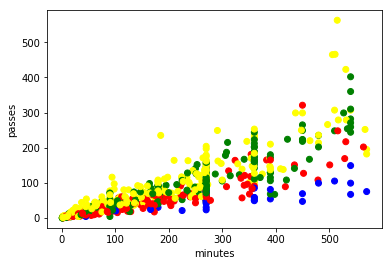

In [16]:
# Create a scatterplot of players showing minutes played versus
# passes made. Color each player based on their position
# (goalkeeper, defender, midfielder, forward).
# Hint: remember copy-paste-modify approach to programming!

x = []
y = []
colors = []
for player in players:
    x.append(float(player['minutes']))
    y.append(float(player['passes']))
    if player['position'] == 'goalkeeper':
        colors.append('blue')
    elif player['position'] == 'defender':
        colors.append('green')
    elif player['position'] == 'midfielder':
        colors.append('yellow')
    else: colors.append('red')
plt.xlabel('minutes')
plt.ylabel('passes')
plt.scatter(x, y, c=colors)
plt.show()

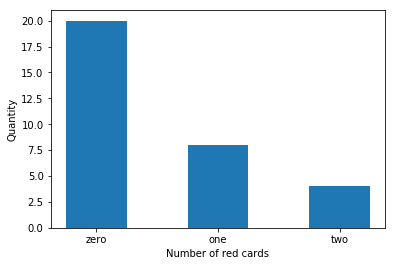

In [22]:
# Create a bar chart showing the number of teams with 0, 1, and 2 red cards.
# Reminder: redCards is a string, so convert or compare accordingly
bars = ['zero', 'one', 'two'] # number of red cards
heights = [0, 0, 0] # number of teams with zero/one/two red cards


for team in teams:
    if int(team['redCards'])==0:
        heights[0]+=1
    if int(team['redCards'])==1:
        heights[1]+=1
    if int(team['redCards'])==2:
        heights[2]+=1
numbars = len(bars)
width = .50
plt.bar(range(numbars), heights, width, align='center')
plt.xlabel('Number of red cards')
plt.ylabel('Quantity')
plt.xticks(range(numbars), bars, rotation='horizontal')
plt.show()

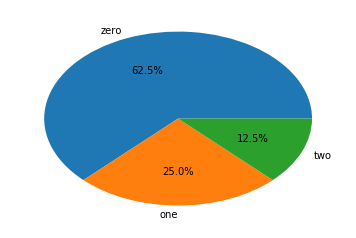

In [26]:
# Create a pie chart showing the relative percentage of teams
# with 0, 1, and 2 red cards.
# Reminder: redCards is a string, so convert or compare accordingly

sizes = [0, 0, 0] # number of teams with zero/one/two red cards
for team in teams:
    if int(team['redCards'])==0:
        sizes[0]+=1
    if int(team['redCards'])==1:
        sizes[1]+=1
    if int(team['redCards'])==2:
        sizes[2]+=1
lbls = ['zero', 'one', 'two']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

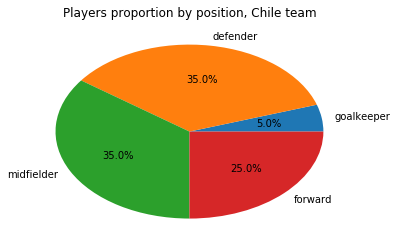

In [35]:
# BONUS!
# Write a loop that interactively asks the user to enter a team name.
# If the team exists, create a pie chart showing how many players the team
# has in each of the four positions.
# If the team doesn't exist, print "Team not in 2010 World Cup".
# If 'quit' is entered, terminate the loop.
# Note: To read a string from the user instead of a number, use
# raw_input() instead of input()

flg = False
while True:
    input_user = input('Type team, Enter quit to exit: ')
    if input_user=='quit':
        break
    for team in teams:
        if input_user in team['team']:
            flg=True            
            sizes = [0, 0, 0, 0] # number of teams with zero/one/two red cards 
            for player in players:
                if player['position'] == 'goalkeeper' and player['team']==input_user:
                    sizes[0]+=1
                elif player['position'] == 'defender' and player['team']==input_user:
                    sizes[1]+=1
                elif player['position'] == 'midfielder' and player['team']==input_user:
                    sizes[2]+=1
                elif player['position'] == 'forward' and player['team']==input_user:
                    sizes[3]+=1
            lbls = ['goalkeeper', 'defender', 'midfielder','forward']
            plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
            plt.title('Players proportion by position, ' + team['team'] + ' team')
            plt.show()       
      
    if flg==False:
        print('Team not in 2010 World Cup')
    flg=False